In [41]:
import pandas as pd
import nltk
from  nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# nltk.download()


In [25]:
df_dict = pd.read_excel("BLOG GENDER BALANCED.xlsx", sheet_name=None)

c:\Users\sunil\miniconda3\envs\dbsenv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
df = df_dict["Retrieve BLOG-GENDER-BALANCED"]
df.head()


,BLOG,GENDER
0,Beyond Getting There: What Travel Days Show U...,F
1,I remember so much about the island; the large...,F
2,I have had asthma and allergies my entire life...,M
3,The last few days have been an emotional rolle...,M
4,If you lined up all the teachers and staff in ...,F


In [27]:
for gen in df['GENDER']:

  if gen=='M':

     df['GENDER'].replace({'M':'1'},inplace=True)

  elif gen=='F':

     df['GENDER'].replace({'F':'0'},inplace=True)

In [28]:
df.dropna(inplace=True)

In [29]:
df["BLOG_Token"] = [word_tokenize(post) for post in df['BLOG'] ]

In [30]:
df.head()

,BLOG,GENDER,BLOG_Token
0,Beyond Getting There: What Travel Days Show U...,0,"[Beyond, Getting, There, :, What, Travel, Days..."
1,I remember so much about the island; the large...,0,"[I, remember, so, much, about, the, island, ;,..."
2,I have had asthma and allergies my entire life...,1,"[I, have, had, asthma, and, allergies, my, ent..."
3,The last few days have been an emotional rolle...,1,"[The, last, few, days, have, been, an, emotion..."
4,If you lined up all the teachers and staff in ...,0,"[If, you, lined, up, all, the, teachers, and, ..."


In [31]:
post_new = []
for each_row in df["BLOG_Token"]:
    post_new.append( [v for v in each_row if v.isalpha()])

In [32]:
post_new_alpha = []

stop_words = set(stopwords.words('english'))

for each_row in post_new:
    post_new_alpha.append( [sw for sw in each_row if sw not in stop_words ])

In [33]:
desc_new_lem = []
lem = WordNetLemmatizer()
for each_row in post_new_alpha:
    desc_new_lem.append([lem.lemmatize(word) for word in each_row])

df["BLOG_Token_cleaned"] = desc_new_lem
df["BLOG_Token_cleaned"] = [" ".join(desc) for desc in df['BLOG_Token'].values]


In [34]:
df.drop(["BLOG", "BLOG_Token"], axis=1, inplace=True)


In [35]:
df.head()

,GENDER,BLOG_Token_cleaned
0,0,Beyond Getting There : What Travel Days Show U...
1,0,I remember so much about the island ; the larg...
2,1,I have had asthma and allergies my entire life...
3,1,The last few days have been an emotional rolle...
4,0,If you lined up all the teachers and staff in ...


In [36]:
cv = CountVectorizer(max_features=1000)
x = cv.fit_transform(df["BLOG_Token_cleaned"]).toarray()
X = pd.DataFrame(x)


In [37]:
y = np.array(df['GENDER'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [39]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

c:\Users\sunil\miniconda3\envs\dbsenv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       252
           1       0.64      0.61      0.62       268

    accuracy                           0.62       520
   macro avg       0.62      0.62      0.62       520
weighted avg       0.62      0.62      0.62       520



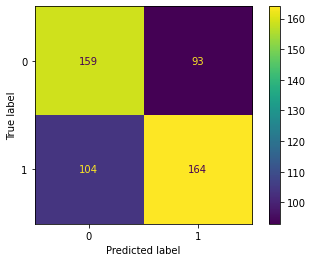

In [42]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred= y_pred);